In [ ]:
# Import required libraries
import kagglehub
import pandas as pd
import os

# Download the latest version of the Titanic dataset from Kaggle
path = kagglehub.dataset_download("pranjalyadav92905/titanic-eda-data")

# Print the local path where the dataset is saved
print("Path to dataset files:", path)



100%|██████████| 22.0k/22.0k [00:00<00:00, 11.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pranjalyadav92905/titanic-eda-data/versions/1


In [ ]:
# Load the Titanic CSV file into a pandas DataFrame
df = pd.read_csv(os.path.join(path, "titanic.csv"))

# Show the first 5 rows of the dataset to check the data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check the dimensions of the dataset
df.shape


(891, 12)

In [ ]:
# Check for missing values in each column
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Count the number of male and female passengers
df.Sex.value_counts()


,count
Sex,
male,577
female,314


In [ ]:
# Check how many missing values are in the Age column
df.Age.isnull().sum()


np.int64(177)

In [ ]:
# Count how many female passengers have missing Age values
df[(df['Sex'] == 'female') & (df['Age'].isnull())].shape[0]


53

In [ ]:
# Find the most common Age (mode) among female passengers
female_mode = df.loc[df['Sex'] == 'female', 'Age'].mode()[0]
female_mode

np.float64(24.0)

In [ ]:
# Fill missing Age values for female passengers with the most common female Age
df.loc[(df['Sex'] == 'female') & (df['Age'].isnull()), 'Age'] = female_mode


In [ ]:
# Find the most common Age (mode) among male passengers
male_mode = df.loc[df['Sex'] == 'male', 'Age'].mode()[0]
male_mode

np.float64(19.0)

In [ ]:
# Fill missing Age values for male passengers with the most common male Age
df.loc[(df['Sex'] == 'male') & (df['Age'].isnull()), 'Age'] = male_mode


In [ ]:

# Fill missing values in the 'Embarked' column with the most common port 'S'
df['Embarked'] = df['Embarked'].fillna('S')



In [ ]:
df = df.drop('Cabin', axis=1)


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


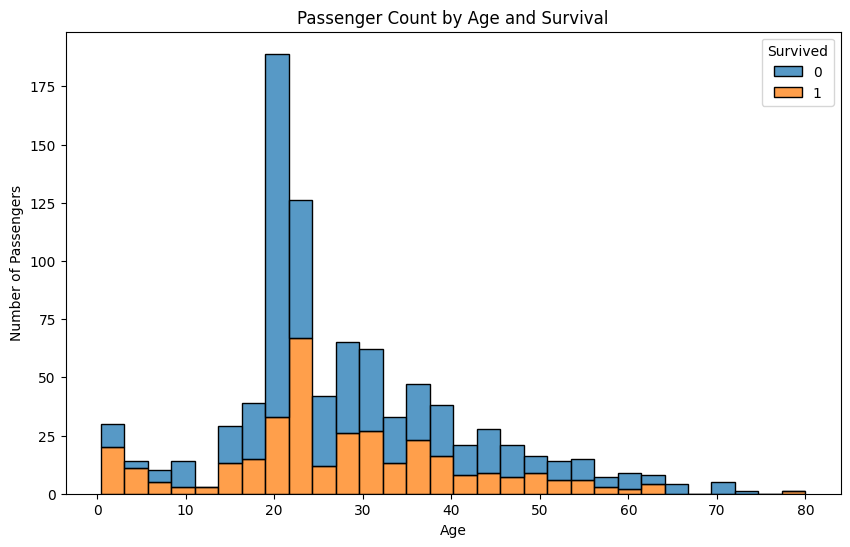

In [ ]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of Age, stacked by Survival status
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Passenger Count by Age and Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


In [ ]:
# Group passengers by 'Embarked' port and find the maximum Fare in each group
df.groupby('Embarked')['Fare'].max()


,Fare
Embarked,
C,512.3292
Q,90.0000
S,263.0000


<Axes: xlabel='Pclass', ylabel='Survived'>

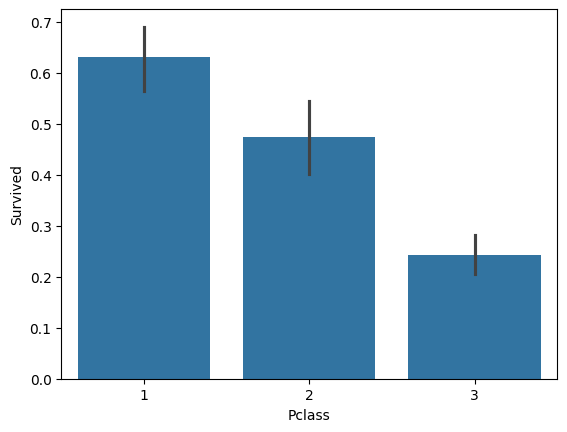

In [ ]:
# Visualize survival rate based on passenger class
import seaborn as sns

sns.barplot(x='Pclass', y='Survived', data=df)



<Axes: xlabel='Embarked', ylabel='Survived'>

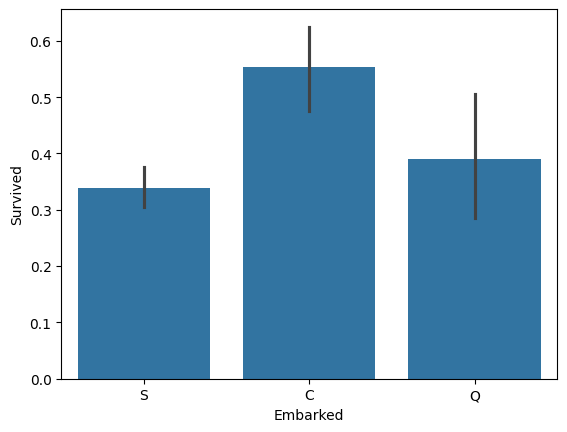

In [ ]:
# Visualize survival rate based on embarkation port
import seaborn as sns

sns.barplot(x='Embarked', y='Survived', data=df)



In [ ]:
# Create a new feature 'FamilySize' by combining siblings/spouses and parents/children
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Drop the original 'SibSp' and 'Parch' columns as they are now redundant
df = df.drop(["SibSp", "Parch"], axis=1)


In [ ]:
# Convert the 'Sex' column into numeric dummy variables
df = pd.get_dummies(df, columns=["Sex"], drop_first=False)


In [ ]:
# Convert the 'Embarked' column into numeric dummy variables
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


In [ ]:
# Drop Name and Ticket columns
df = df.drop(["Name", "Ticket"], axis=1)




# Machine Learning: Model Training & **Accuracy”**

In [ ]:
# Import libraries for model building and evaluation
from sklearn.model_selection import train_test_split  # to split dataset into training and testing sets
from sklearn.linear_model import LogisticRegression    # logistic regression model
from sklearn.metrics import accuracy_score            # to measure model accuracy


In [ ]:
# Separate features (X) and target (y)
X = df.drop(["Survived", "PassengerId"], axis=1)  # all columns except target and ID
y = df["Survived"]                               # target variable: Survived (0 or 1)



In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)  # set max_iter to ensure convergence
model.fit(X_train, y_train)               # train the model on the training data


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.7988826815642458


In [ ]:
# Import additional metrics for detailed evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Test Accuracy: 0.7988826815642458

Confusion Matrix:
[[90 15]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
import numpy as np

def predict_passenger(model):
    print("Enter Passenger Information:")

    # Input with validation
    while True:
        try:
            pclass = int(input("Pclass (1/2/3): "))
            if pclass in [1, 2, 3]:
                break
            else:
                print("Please enter 1, 2, or 3.")
        except ValueError:
            print("Invalid input! Please enter a number (1, 2, or 3).")

    # Safe numeric inputs
    def safe_float(prompt):
        while True:
            try:
                return float(input(prompt))
            except ValueError:
                print(" Please enter a valid number.")

    age = safe_float("Age: ")
    fare = safe_float("Fare: ")
    family_size = int(safe_float("FamilySize (SibSp + Parch + 1): "))

    # Encode Sex
    sex = input("Sex (male/female): ").lower()
    sex_female = 1 if sex == "female" else 0
    sex_male = 1 if sex == "male" else 0

    # Encode Embarked
    embarked = input("Embarked (C/Q/S): ").upper()
    embarked_q = 1 if embarked == "Q" else 0
    embarked_s = 1 if embarked == "S" else 0

    # Feature array
    passenger = np.array([[pclass, age, fare, family_size,
                           sex_female, sex_male,
                           embarked_q, embarked_s]])

    # Prediction
    pred = model.predict(passenger)[0]
    prob = model.predict_proba(passenger)[0]





    print("\n Prediction Result:")
    if pred == 1:
        print("Passenger SURVIVED")
    else:
        print("Passenger DID NOT SURVIVE ")

    print(f"Probability → Died: {prob[0]*100:.2f}% | Survived: {prob[1]*100:.2f}%")


In [ ]:
# Run the interactive passenger prediction function
predict_passenger(model)


Enter Passenger Information:
Pclass (1/2/3): 1
Age: 55
Fare: 444
FamilySize (SibSp + Parch + 1): 1
Sex (male/female): 1
Embarked (C/Q/S): 1

 Prediction Result:
Passenger SURVIVED
Probability → Died: 11.48% | Survived: 88.52%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Step-by-Step Explanation:

Display a message for the user
The program starts by showing a message:
"Enter Passenger Information:"
This lets the user know that they must enter details one by one.

Input Validation (Error Handling)
For every user input, the function checks if the entered value is valid.

If the user enters text instead of a number (like “abc”),
the program will show an error message and ask again.

This prevents the program from crashing due to invalid or empty inputs.

For example:

Pclass must be 1, 2, or 3.

Age, Fare, and FamilySize must be valid numbers.

Taking Passenger Details
The function asks for the following details:

Pclass: Passenger class (1 = upper, 2 = middle, 3 = lower)

Age: Passenger’s age

Fare: Ticket fare paid by the passenger

FamilySize: Total family members traveling together (SibSp + Parch + 1)

Sex: Either “male” or “female”

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Encoding Text Data (Sex and Embarked)
Since a machine learning model only understands numbers,
the text data like “male”, “female”, “C”, “Q”, and “S” are converted into numeric form.

For Sex:

sex_female = 1 if passenger is female, otherwise 0

sex_male = 1 if passenger is male, otherwise 0

For Embarked:

embarked_Q = 1 if passenger boarded from Queenstown

embarked_S = 1 if passenger boarded from Southampton

If boarded from Cherbourg (C), both values remain 0
(This technique is called One-Hot Encoding.)

Creating the Feature Array
After collecting and encoding all inputs,
the function groups them into a single NumPy array in the correct order.
This array represents one passenger’s complete information,
ready to be passed to the model for prediction.

Making Predictions
The model uses the passenger’s information to predict the survival outcome.

model.predict() → gives the final prediction (1 = Survived, 0 = Died)

model.predict_proba() → gives the survival probability for both outcomes.

Displaying the Result
Finally, the function prints a clear and friendly message showing:

Whether the passenger survived  or did not survive ***italicized text***

The probability percentages for both outcomes (Died vs Survived)

 Summary:

In short, this function:

Interacts with the user

Validates all inputs

Encodes categorical data

Prepares the data for prediction

Uses a trained model to predict survival

Displays the result with probabilities in an easy-to-understand format

📄 [View Full Titanic Data Visualization Report (PDF)](7a52d371-65c5-44fc-a05b-111064740cc9.pdf)
